In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


In [2]:
with open('myo_data.pkl', 'rb') as file:
    myo_dict = pickle.load(file)

myo_dict

{'qpos':       hip_flexion_l  hip_flexion_r  hip_adduction_l  hip_adduction_r  \
 2          0.038391       0.283590         0.020268         0.093369   
 3          0.053719       0.274420         0.014063         0.093792   
 4          0.072409       0.264438         0.006557         0.094312   
 5          0.093232       0.254665        -0.001745         0.094828   
 6          0.115871       0.245311        -0.010736         0.095303   
 ...             ...            ...              ...              ...   
 5996       0.300930       0.030890         0.055469        -0.011968   
 5997       0.294798       0.043559         0.059675        -0.016261   
 5998       0.290852       0.052057         0.062536        -0.019169   
 5999       0.289044       0.056048         0.063890        -0.020530   
 6000       0.288634       0.056965         0.064202        -0.020841   
 
       hip_rotation_l  hip_rotation_r  knee_angle_l  knee_angle_r  \
 2          -0.081852       -0.033976      0.

In [3]:
sample_gait_cycle = pd.read_csv("./myosuite/envs/myo/assets/leg/sample_gait_cycle.csv")
sample_gait_cycle

,hip_flexion_l,hip_adduction_l,hip_rotation_l,hip_flexion_r,hip_adduction_r,hip_rotation_r,knee_angle_l,osl_knee_angle_r,ankle_angle_l,osl_ankle_angle_r,...,pelvis_euler_yaw,pelvis_vel_X,pelvis_vel_Y,pelvis_vel_Z,l_foot_relative_X,l_foot_relative_Y,l_foot_relative_Z,r_foot_relative_X,r_foot_relative_Y,r_foot_relative_Z
0,0.482555,0.016534,-0.118055,-0.297110,0.027959,-0.250895,-0.051826,0.102301,0.105687,0.255768,...,-1.561604,1.294390,0.121960,-0.235040,0.464660,-0.114920,-0.746140,-0.184410,0.104260,-0.859920
1,0.486527,0.018594,-0.107967,-0.296377,0.021547,-0.248998,-0.050762,0.110195,0.110943,0.250559,...,-1.564151,1.307554,0.127931,-0.215534,0.466788,-0.112943,-0.744225,-0.186616,0.107787,-0.860179
2,0.488675,0.022429,-0.097105,-0.296786,0.012990,-0.245461,-0.047357,0.118771,0.115901,0.243271,...,-1.567762,1.317836,0.132702,-0.190638,0.466990,-0.110135,-0.743845,-0.189856,0.112547,-0.860402
3,0.488842,0.027563,-0.088164,-0.299209,0.003502,-0.240288,-0.041591,0.127210,0.118367,0.234527,...,-1.571942,1.330373,0.139595,-0.163604,0.465258,-0.106885,-0.745216,-0.194561,0.117954,-0.860321
4,0.486944,0.033507,-0.083681,-0.304404,-0.005740,-0.233539,-0.033433,0.134753,0.116376,0.224929,...,-1.576208,1.349907,0.151604,-0.137689,0.461621,-0.103565,-0.748508,-0.201097,0.123444,-0.859694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.460774,0.063877,-0.096896,-0.267216,0.006856,-0.244421,-0.002142,0.092652,0.118840,0.229338,...,-1.521470,1.125421,0.054939,-0.255215,0.434829,-0.077758,-0.767323,-0.156676,0.116735,-0.868816
243,0.461063,0.061703,-0.093521,-0.272489,0.008515,-0.239134,-0.014098,0.095705,0.119908,0.238824,...,-1.522214,1.134379,0.048726,-0.265296,0.438729,-0.079708,-0.763998,-0.161848,0.115769,-0.866907
244,0.462629,0.059573,-0.087519,-0.275607,0.009324,-0.230807,-0.023414,0.099983,0.119316,0.251659,...,-1.524773,1.152051,0.053830,-0.267004,0.442701,-0.082272,-0.760898,-0.165682,0.115207,-0.864977
245,0.465362,0.057615,-0.079958,-0.277193,0.009151,-0.220650,-0.030047,0.104661,0.117424,0.264566,...,-1.528916,1.179068,0.070643,-0.259524,0.446662,-0.085134,-0.758083,-0.168395,0.115191,-0.863270


In [4]:
sample_gait_cycle.keys()

Index(['hip_flexion_l', 'hip_adduction_l', 'hip_rotation_l', 'hip_flexion_r',
       'hip_adduction_r', 'hip_rotation_r', 'knee_angle_l', 'osl_knee_angle_r',
       'ankle_angle_l', 'osl_ankle_angle_r', 'pelvis_euler_roll',
       'pelvis_euler_pitch', 'pelvis_euler_yaw', 'pelvis_vel_X',
       'pelvis_vel_Y', 'pelvis_vel_Z', 'l_foot_relative_X',
       'l_foot_relative_Y', 'l_foot_relative_Z', 'r_foot_relative_X',
       'r_foot_relative_Y', 'r_foot_relative_Z'],
      dtype='object')

In [5]:
def produce_graphs(theia_columns, lm_columns, labels, theia_len, lm_len, unit, title, flip = 1):
   
    #Theia Values
    theia_values = []
    for column in theia_columns:
        theia_values.append(flip*myo_dict['qpos'][column][:theia_len])
    theia_indices = list(range(theia_len))

    #Loco Mujoco Values
    myo_values = []
    for column in lm_columns:
        myo_values.append(sample_gait_cycle[column][:lm_len])
    myo_indices = list(range(lm_len))
    
    # Plot the values
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    colors = ['b','r','g']

    # Theia plot
    for i in range(len(theia_columns)):
        axes[0].plot(theia_indices, theia_values[i], marker='.', markersize=3, color=colors[i], label=labels[i])
    axes[0].set_xlabel('time stamps')
    axes[0].set_ylabel(unit)
    axes[0].set_title("Theia " + title)
    axes[0].grid(True)
    axes[0].legend()

    #Loco Mujoco plot
    for i in range(len(lm_columns)):
        axes[1].plot(myo_indices, myo_values[i], marker='.', markersize = 3, color=colors[i], label=labels[i])
    axes[1].set_xlabel('time stamps')
    axes[1].set_ylabel(unit)
    axes[1].set_title("MyoSuite " + title)
    axes[1].grid(True)
    axes[1].legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

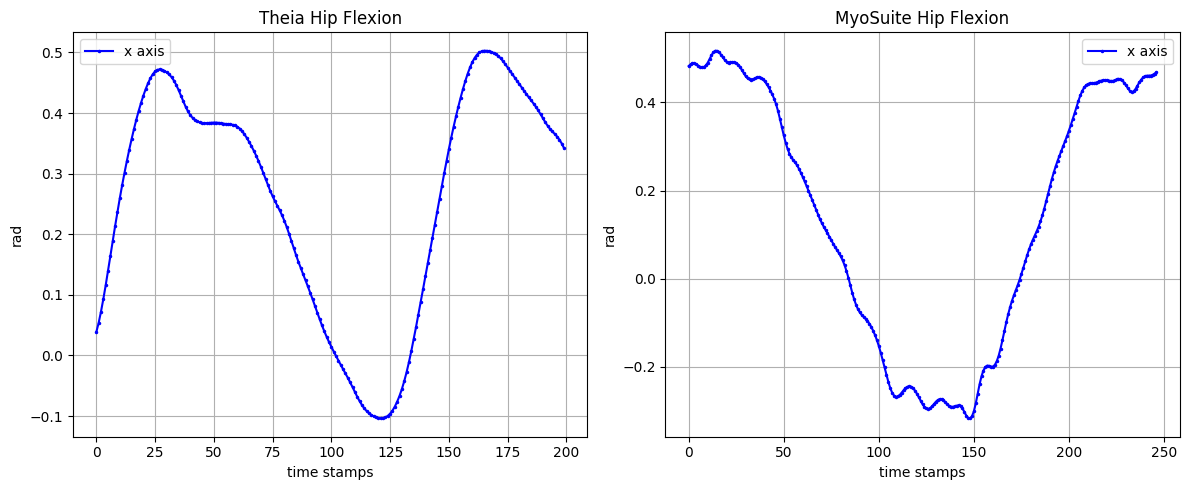

In [7]:
theia_columns =["hip_flexion_l"]
lm_columns = ["hip_flexion_l"]
labels = ["x axis"]
produce_graphs(theia_columns, lm_columns, labels, 200, 247, "rad", "Hip Flexion")

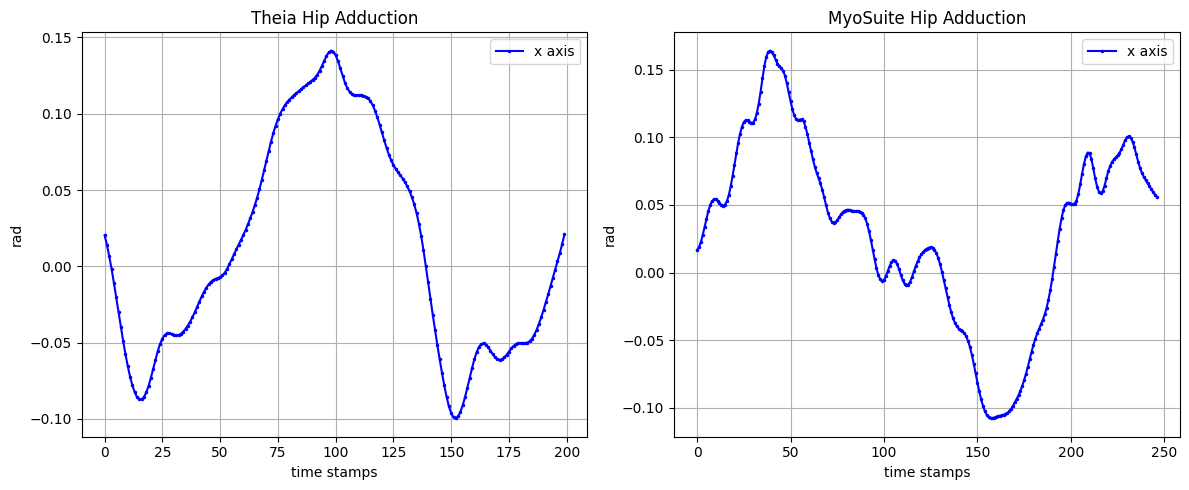

In [18]:
theia_columns =["hip_adduction_l"]
lm_columns = ["hip_adduction_l"]
labels = ["x axis"]
produce_graphs(theia_columns, lm_columns, labels, 200, 247, "rad", "Hip Adduction")

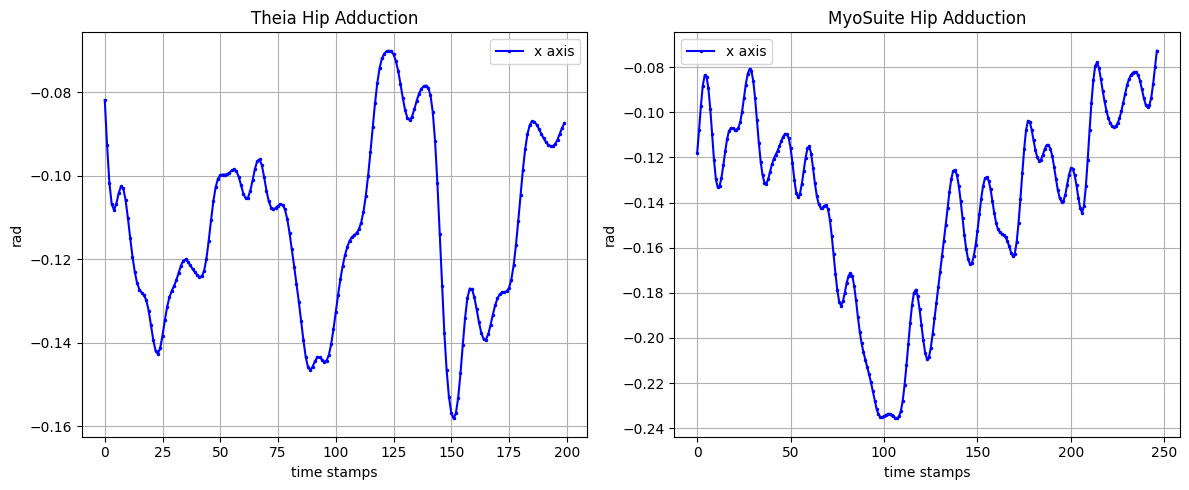

In [14]:
theia_columns =["hip_rotation_l"]
lm_columns = ["hip_rotation_l"]
labels = ["x axis"]
produce_graphs(theia_columns, lm_columns, labels, 200, 247, "rad", "Hip Adduction")

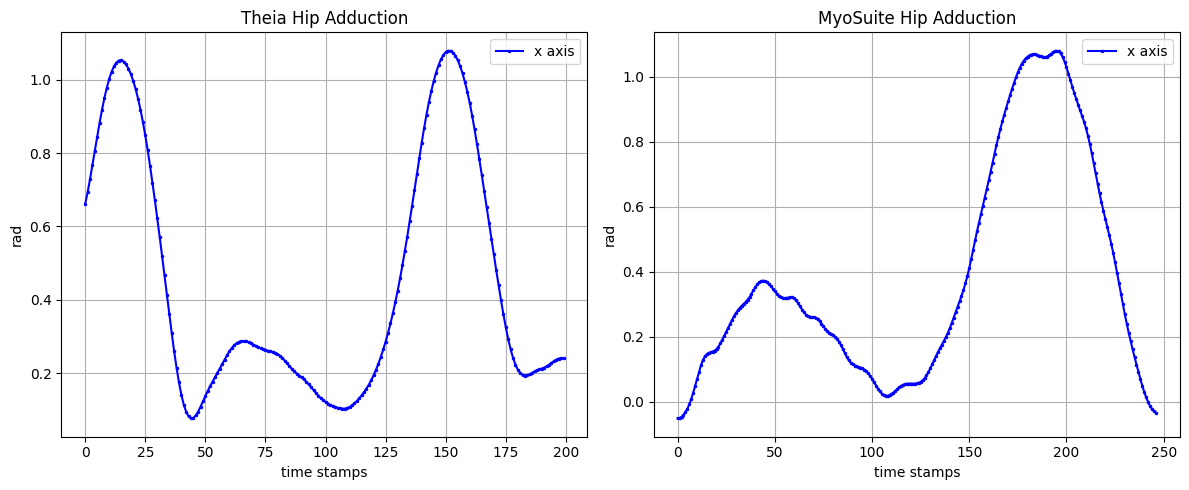

In [17]:
theia_columns =["knee_angle_l"]
lm_columns = ["knee_angle_l"]
labels = ["x axis"]
produce_graphs(theia_columns, lm_columns, labels, 200, 247, "rad", "Hip Adduction")

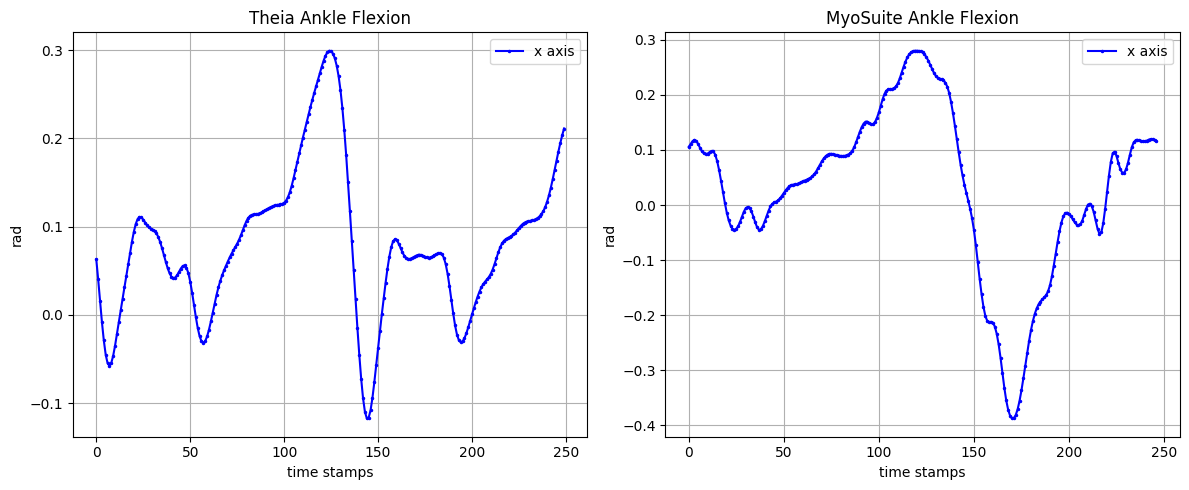

In [12]:
theia_columns =["ankle_angle_l"]
lm_columns = ["ankle_angle_l"]
labels = ["x axis"]
produce_graphs(theia_columns, lm_columns, labels, 250, 247, "rad", "Ankle Flexion")

In [11]:
from myosuite.utils import gym
env = gym.make('myoLegWalk_IL-v0')
env.reset()
for _ in range(1000):
    env.mj_render()
    env.step(env.action_space.sample()) # take a random action
env.close()

MyoSuite:> Registering Myo Envs
    MyoSuite: A contact-rich simulation suite for musculoskeletal motor control
        Vittorio Caggiano, Huawei Wang, Guillaume Durandau, Massimo Sartori, Vikash Kumar
        L4DC-2019 | https://sites.google.com/view/myosuite
    


/Users/sunnykim/anaconda3/envs/myosuite/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:189: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/Users/sunnykim/anaconda3/envs/myosuite/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.mj_render to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.mj_render` for environment variables or `env.get_wrapper_attr('mj_render')` that will search the reminding wrappers.
  logger.warn(


RuntimeError: `launch_passive` requires that the Python script be run under `mjpython` on macOS